In [1]:
import torch
from torch.utils.data import DataLoader
import lightning as L
from lightning.pytorch.loggers import WandbLogger
from torchvision import transforms
from torchvision.datasets import MNIST
import wandb

from classifier import CNN

In [5]:
train_dataset = MNIST(root="./datasets", train=True,
                           transform=transforms.ToTensor(), download=True)
test_dataset = MNIST(root="./datasets", train=False,
                           transform=transforms.ToTensor(), download=True)

# Define the sizes for train, validation, and test sets
TRAIN_SIZE = int(1 * len(train_dataset))
VAL_SIZE = len(train_dataset) - TRAIN_SIZE
TEST_SIZE = len(test_dataset)
BATCH_SIZE = 100

train_data, val_data = torch.utils.data.random_split(
    train_dataset, [TRAIN_SIZE, VAL_SIZE]
)

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [6]:
classifier = CNN()
# Initialize a trainer
wandb_logger = WandbLogger(project="Classifier-MNIST", entity="network-to-network")
trainer = L.Trainer(max_epochs=5, logger=wandb_logger)

# Train the model
trainer.fit(classifier, train_loader)#, val_loader)



GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\luke\anaconda3\envs\gnn\Lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
c:\Users\luke\anaconda3\envs\gnn\Lib\site-packages\lightning\pytorch\loggers\wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
c:\Users\luke\anaconda3\envs\gnn\Lib\site-packages\lightning\pytorch\callbacks\model_checkpoint.py:653: Checkpoint directory .\Classifier-MNIST\gbxvw7s4\checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type               | Params
------------------------------------------------
0 | conv1    | Conv2d             | 320   
1 | conv2  

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


In [7]:
trainer.test(classifier, dataloaders=test_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9909999966621399
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_accuracy': 0.9909999966621399}]

2


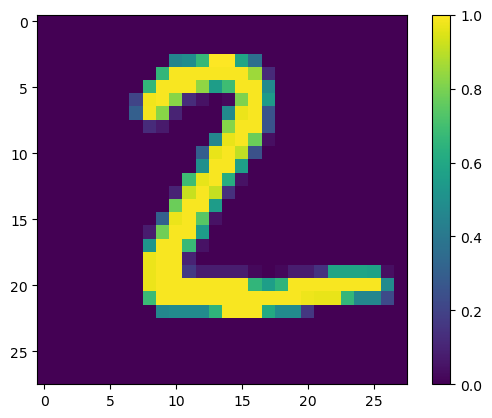

In [11]:
import matplotlib.pyplot as plt

classifier.eval()
image, label = test_dataset[1]
plt.imshow(image[0].numpy())
plt.colorbar()
print(label)

In [12]:
output = classifier(image)
prediction = torch.argmax(output)
print(prediction)

tensor(2)


In [8]:
torch.save(classifier.state_dict(), 'classifier.pth')